In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import cv2 as cv
import pywt

In [2]:
# img=cv.imread("images_data/cristiano_ronaldo/gettyimages-1323514768-612x612.jpg")
# # plt.imshow(img)
# gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


In [3]:
face_cascade = cv.CascadeClassifier('cascade_opencv/face.xml')
eye_cascade = cv.CascadeClassifier('cascade_opencv/eye.xml')

# faces = face_cascade.detectMultiScale(gray)
# faces

In [4]:
# (x,y,w,h) = faces[0]
# x,y,w,h

In [5]:
# face_img = cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

# roi_color = face_img[y:y+h, x:x+w]
# plt.imshow(roi_color)

In [6]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv.cvtColor( imArray,cv.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [7]:
# plt.imshow(w2d(roi_color))

In [8]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv.imread(image_path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
        else:
            return False

In [9]:
img_messi=get_cropped_image_if_2_eyes("images_data/lionel_messi/gettyimages-1170497074-612x612.jpg")

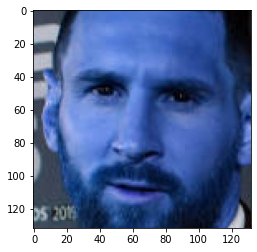

In [10]:
img_messi
plt.imshow(img_messi)

## Iterating over every image and storing it in cropped folder


In [11]:
import os

celebrity_name =["lionel_messi","cristiano_ronaldo","neymar_jr"]

path_crop_folder="cropped"
path_img_folder="images_data"


In [20]:
celeb_crop_dict={"lionel_messi":[],"cristiano_ronaldo":[],"neyamr_jr":[]}
if  os.path.exists(path_crop_folder):
#     os.mkdir(path_crop_folder)
#     os.chdir(path_crop_folder)
    for celeb in celebrity_name:
        

#             print(celeb)
#             os.mkdir(celeb)
            print("hello")

            for i in os.scandir(path_img_folder+"/"+celeb):
                path_img=i.path.split("/")[-1].split(celeb)[-1].replace("\\","")
                img_face=get_cropped_image_if_2_eyes(path_img_folder+"/"+celeb+"/"+path_img)
                if(img_face!=False):
                    
                    cropped_file_name = celeb + str(len(celeb_crop_dict.get(celeb))) + ".png"
                    cropped_file_path = path_crop_folder + "/"  +cropped_file_name
                    print(cropped_file_path)

                    celeb_crop_dict[celeb].append(cropped_file_path)
                    cv.imwrite(cropped_file_path, img_face)
                
                    

hello
cropped/lionel_messi0.png


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgcodecs\src\loadsave.cpp:801: error: (-215:Assertion failed) !_img.empty() in function 'cv::imwrite'


In [19]:
celeb_crop_dict

{'lionel_messi': ['cropped/lionel_messi0.png',
  'cropped/lionel_messi1.png',
  'cropped/lionel_messi2.png',
  'cropped/lionel_messi3.png',
  'cropped/lionel_messi4.png',
  'cropped/lionel_messi5.png',
  'cropped/lionel_messi6.png',
  'cropped/lionel_messi7.png',
  'cropped/lionel_messi8.png',
  'cropped/lionel_messi9.png',
  'cropped/lionel_messi10.png',
  'cropped/lionel_messi11.png',
  'cropped/lionel_messi12.png',
  'cropped/lionel_messi13.png',
  'cropped/lionel_messi14.png',
  'cropped/lionel_messi15.png',
  'cropped/lionel_messi16.png',
  'cropped/lionel_messi17.png',
  'cropped/lionel_messi18.png',
  'cropped/lionel_messi19.png',
  'cropped/lionel_messi20.png',
  'cropped/lionel_messi21.png',
  'cropped/lionel_messi22.png'],
 'cristiano_ronaldo': ['cropped/cristiano_ronaldo0.png',
  'cropped/cristiano_ronaldo1.png',
  'cropped/cristiano_ronaldo2.png',
  'cropped/cristiano_ronaldo3.png',
  'cropped/cristiano_ronaldo4.png',
  'cropped/cristiano_ronaldo5.png',
  'cropped/cristiano

In [14]:
a=get_cropped_image_if_2_eyes("test/gettyimages-1337148416-612x612.jpg")

In [15]:
np.array(a)


array(None, dtype=object)

In [16]:
a